In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/"
sz=224

In [5]:
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

In [6]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, bs= 32,tfms=tfms_from_model(arch, sz), test_name="test")
learn = ConvLearner.pretrained(arch, data, precompute=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /content/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 32163894.81it/s]


100%|██████████| 2492/2492 [15:19<00:00,  2.71it/s]


In [7]:
lrf=learn.lr_find()

 76%|███████▋  | 429/561 [00:09<00:02, 46.27it/s, loss=2.54]


In [8]:
#learn.sched.plot_lr()

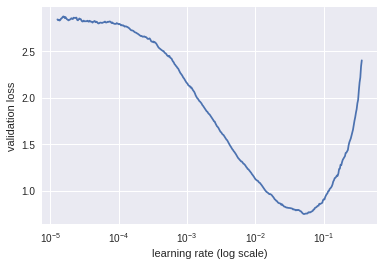

In [9]:
learn.sched.plot()

In [72]:
learn.fit(1e-2,5 )

epoch      trn_loss   val_loss   accuracy   
    0      0.052418   0.025372   0.992193  
    1      0.063124   0.021566   0.993977  
    2      0.049226   0.023495   0.992416  
    3      0.041366   0.022325   0.9942    
    4      0.050089   0.025985   0.993754  



[array([0.02599]), 0.9937541824670979]

In [11]:
learn.save('first_save')

In [12]:
#test
log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)

In [13]:
probs.shape

(79726, 10)

In [15]:
probs[1]

array([0.11003, 0.00002, 0.00002, 0.0634 , 0.20423, 0.00253, 0.06336, 0.00079, 0.19215, 0.36349],
      dtype=float32)

In [16]:
type(probs)

numpy.ndarray

In [21]:
res = pd.DataFrame({'c0':probs[:,0],'c1':probs[:,1],'c2':probs[:,2],
                        'c3':probs[:,3],'c4':probs[:,4],'c5':probs[:,5],
                        'c6':probs[:,6],'c7':probs[:,7],'c8':probs[:,8],'c9':probs[:,9]})

In [22]:
res.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,4.589045e-04,0.008934,8.544634e-08,9.840928e-01,2.024163e-04,0.000329,1.538359e-06,0.000038,0.000016,0.005927
1,1.100251e-01,0.000016,1.724593e-05,6.340417e-02,2.042255e-01,0.002526,6.335963e-02,0.000792,0.192148,0.363486
2,7.026342e-01,0.009036,2.129168e-04,6.223440e-02,1.937400e-03,0.036072,8.455447e-02,0.048173,0.023146,0.032001
3,9.351330e-09,0.000848,8.508120e-09,1.750985e-08,7.998540e-09,0.000011,3.605804e-08,0.997022,0.002086,0.000033
4,3.410858e-01,0.000071,1.168825e-02,3.985311e-02,5.259598e-01,0.020835,2.533021e-03,0.000604,0.056602,0.000768


In [23]:
TEST = 'data/test'

In [42]:
fname = os.listdir(TEST)

In [35]:
#fname = pd.DataFrame(fname)

In [45]:
index = []
for i in range(len(fname)):
    index.append(i)
    

In [46]:
len(index)


79726

In [49]:
len(fname)

79726

In [50]:
newres =res.rename(index=dict(zip(index,fname)))

In [64]:
newres.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
img_23138.jpg,4.589045e-04,0.008934,8.544634e-08,9.840928e-01,2.024163e-04,0.000329,1.538359e-06,0.000038,0.000016,0.005927
img_73419.jpg,1.100251e-01,0.000016,1.724593e-05,6.340417e-02,2.042255e-01,0.002526,6.335963e-02,0.000792,0.192148,0.363486
img_33217.jpg,7.026342e-01,0.009036,2.129168e-04,6.223440e-02,1.937400e-03,0.036072,8.455447e-02,0.048173,0.023146,0.032001
img_90822.jpg,9.351330e-09,0.000848,8.508120e-09,1.750985e-08,7.998540e-09,0.000011,3.605804e-08,0.997022,0.002086,0.000033
img_77769.jpg,3.410858e-01,0.000071,1.168825e-02,3.985311e-02,5.259598e-01,0.020835,2.533021e-03,0.000604,0.056602,0.000768


In [68]:
newres.index.names = ['img']

In [69]:
newres.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
img,,,,,,,,,,
img_23138.jpg,4.589045e-04,0.008934,8.544634e-08,9.840928e-01,2.024163e-04,0.000329,1.538359e-06,0.000038,0.000016,0.005927
img_73419.jpg,1.100251e-01,0.000016,1.724593e-05,6.340417e-02,2.042255e-01,0.002526,6.335963e-02,0.000792,0.192148,0.363486
img_33217.jpg,7.026342e-01,0.009036,2.129168e-04,6.223440e-02,1.937400e-03,0.036072,8.455447e-02,0.048173,0.023146,0.032001
img_90822.jpg,9.351330e-09,0.000848,8.508120e-09,1.750985e-08,7.998540e-09,0.000011,3.605804e-08,0.997022,0.002086,0.000033
img_77769.jpg,3.410858e-01,0.000071,1.168825e-02,3.985311e-02,5.259598e-01,0.020835,2.533021e-03,0.000604,0.056602,0.000768


In [70]:
SUBM = f'{PATH}/sub/'
os.makedirs(SUBM, exist_ok=True)
newres.to_csv(f'{SUBM}subm.gz', compression='gzip')

In [71]:
FileLink(f'{SUBM}subm.gz')

/content/clouderizer/fast.ai/fastai/courses/dl1/data/sub/subm.gz